In [70]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, mean_squared_log_error

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_text

from sklearn.model_selection import train_test_split, cross_val_score

The dataset for this competition (both train and test) was generated from a deep learning model trained on the Media Campaign Cost Prediction dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.
train.csv - the training dataset; cost is the target

In [87]:
sample=pd.read_csv('playground-series-s3e11/sample_submission.csv')


In [6]:
train=pd.read_csv('playground-series-s3e11/train.csv')
test=pd.read_csv('playground-series-s3e11/test.csv')

In [11]:
train.describe()

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
count,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000
mean,180167.500000,6.337376,3.043881,2.456482,0.689390,2.203813,13.822071,0.568086,0.327797,18.972706,28180.333442,0.564839,0.277394,0.504807,0.504832,0.503191,99.614729
std,104020.187637,3.307980,0.784676,1.488992,1.214732,1.084293,4.614792,0.495343,0.469411,10.212912,5968.874074,0.495779,0.447713,0.499978,0.499977,0.499991,29.939435
min,0.000000,0.510000,1.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,20319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.790000
25%,90083.750000,3.720000,3.000000,1.000000,0.000000,1.000000,9.710000,0.000000,0.000000,10.000000,23593.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.320000
50%,180167.500000,5.780000,3.000000,2.000000,0.000000,2.000000,13.600000,1.000000,0.000000,20.000000,27694.000000,1.000000,0.000000,1.000000,1.000000,1.000000,98.810000
75%,270251.250000,8.400000,4.000000,4.000000,1.000000,3.000000,17.700000,1.000000,1.000000,28.000000,33858.000000,1.000000,1.000000,1.000000,1.000000,1.000000,126.620000
max,360335.000000,22.920000,6.000000,5.000000,5.000000,4.000000,21.900000,1.000000,1.000000,36.000000,39696.000000,1.000000,1.000000,1.000000,1.000000,1.000000,149.750000


In [12]:
test.describe()

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist
count,240224.00000,240224.000000,240224.000000,240224.000000,240224.000000,240224.000000,240224.000000,240224.000000,240224.000000,240224.000000,240224.000000,240224.000000,240224.000000,240224.000000,240224.000000,240224.000000
mean,480447.50000,6.353813,3.043930,2.454039,0.685381,2.198173,13.828380,0.565747,0.326928,18.959933,28174.648840,0.564173,0.275647,0.504396,0.504429,0.501815
std,69346.83987,3.307402,0.782982,1.487416,1.211368,1.085129,4.623458,0.495660,0.469092,10.216219,5974.494735,0.495866,0.446841,0.499982,0.499981,0.499998
min,360336.00000,0.510000,1.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,20319.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,420391.75000,3.750000,3.000000,1.000000,0.000000,1.000000,9.710000,0.000000,0.000000,10.000000,23593.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,480447.50000,5.800000,3.000000,2.000000,0.000000,2.000000,13.600000,1.000000,0.000000,20.000000,27694.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,540503.25000,8.400000,4.000000,4.000000,1.000000,3.000000,17.800000,1.000000,1.000000,28.000000,33858.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,600559.00000,22.920000,6.000000,5.000000,5.000000,4.000000,21.900000,1.000000,1.000000,36.000000,39696.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360336 entries, 0 to 360335
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          360336 non-null  int64  
 1   store_sales(in millions)    360336 non-null  float64
 2   unit_sales(in millions)     360336 non-null  float64
 3   total_children              360336 non-null  float64
 4   num_children_at_home        360336 non-null  float64
 5   avg_cars_at home(approx).1  360336 non-null  float64
 6   gross_weight                360336 non-null  float64
 7   recyclable_package          360336 non-null  float64
 8   low_fat                     360336 non-null  float64
 9   units_per_case              360336 non-null  float64
 10  store_sqft                  360336 non-null  float64
 11  coffee_bar                  360336 non-null  float64
 12  video_store                 360336 non-null  float64
 13  salad_bar     

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'store_sales(in millions)'}>,
        <Axes: title={'center': 'unit_sales(in millions)'}>,
        <Axes: title={'center': 'total_children'}>],
       [<Axes: title={'center': 'num_children_at_home'}>,
        <Axes: title={'center': 'avg_cars_at home(approx).1'}>,
        <Axes: title={'center': 'gross_weight'}>,
        <Axes: title={'center': 'recyclable_package'}>],
       [<Axes: title={'center': 'low_fat'}>,
        <Axes: title={'center': 'units_per_case'}>,
        <Axes: title={'center': 'store_sqft'}>,
        <Axes: title={'center': 'coffee_bar'}>],
       [<Axes: title={'center': 'video_store'}>,
        <Axes: title={'center': 'salad_bar'}>,
        <Axes: title={'center': 'prepared_food'}>,
        <Axes: title={'center': 'florist'}>],
       [<Axes: title={'center': 'cost'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

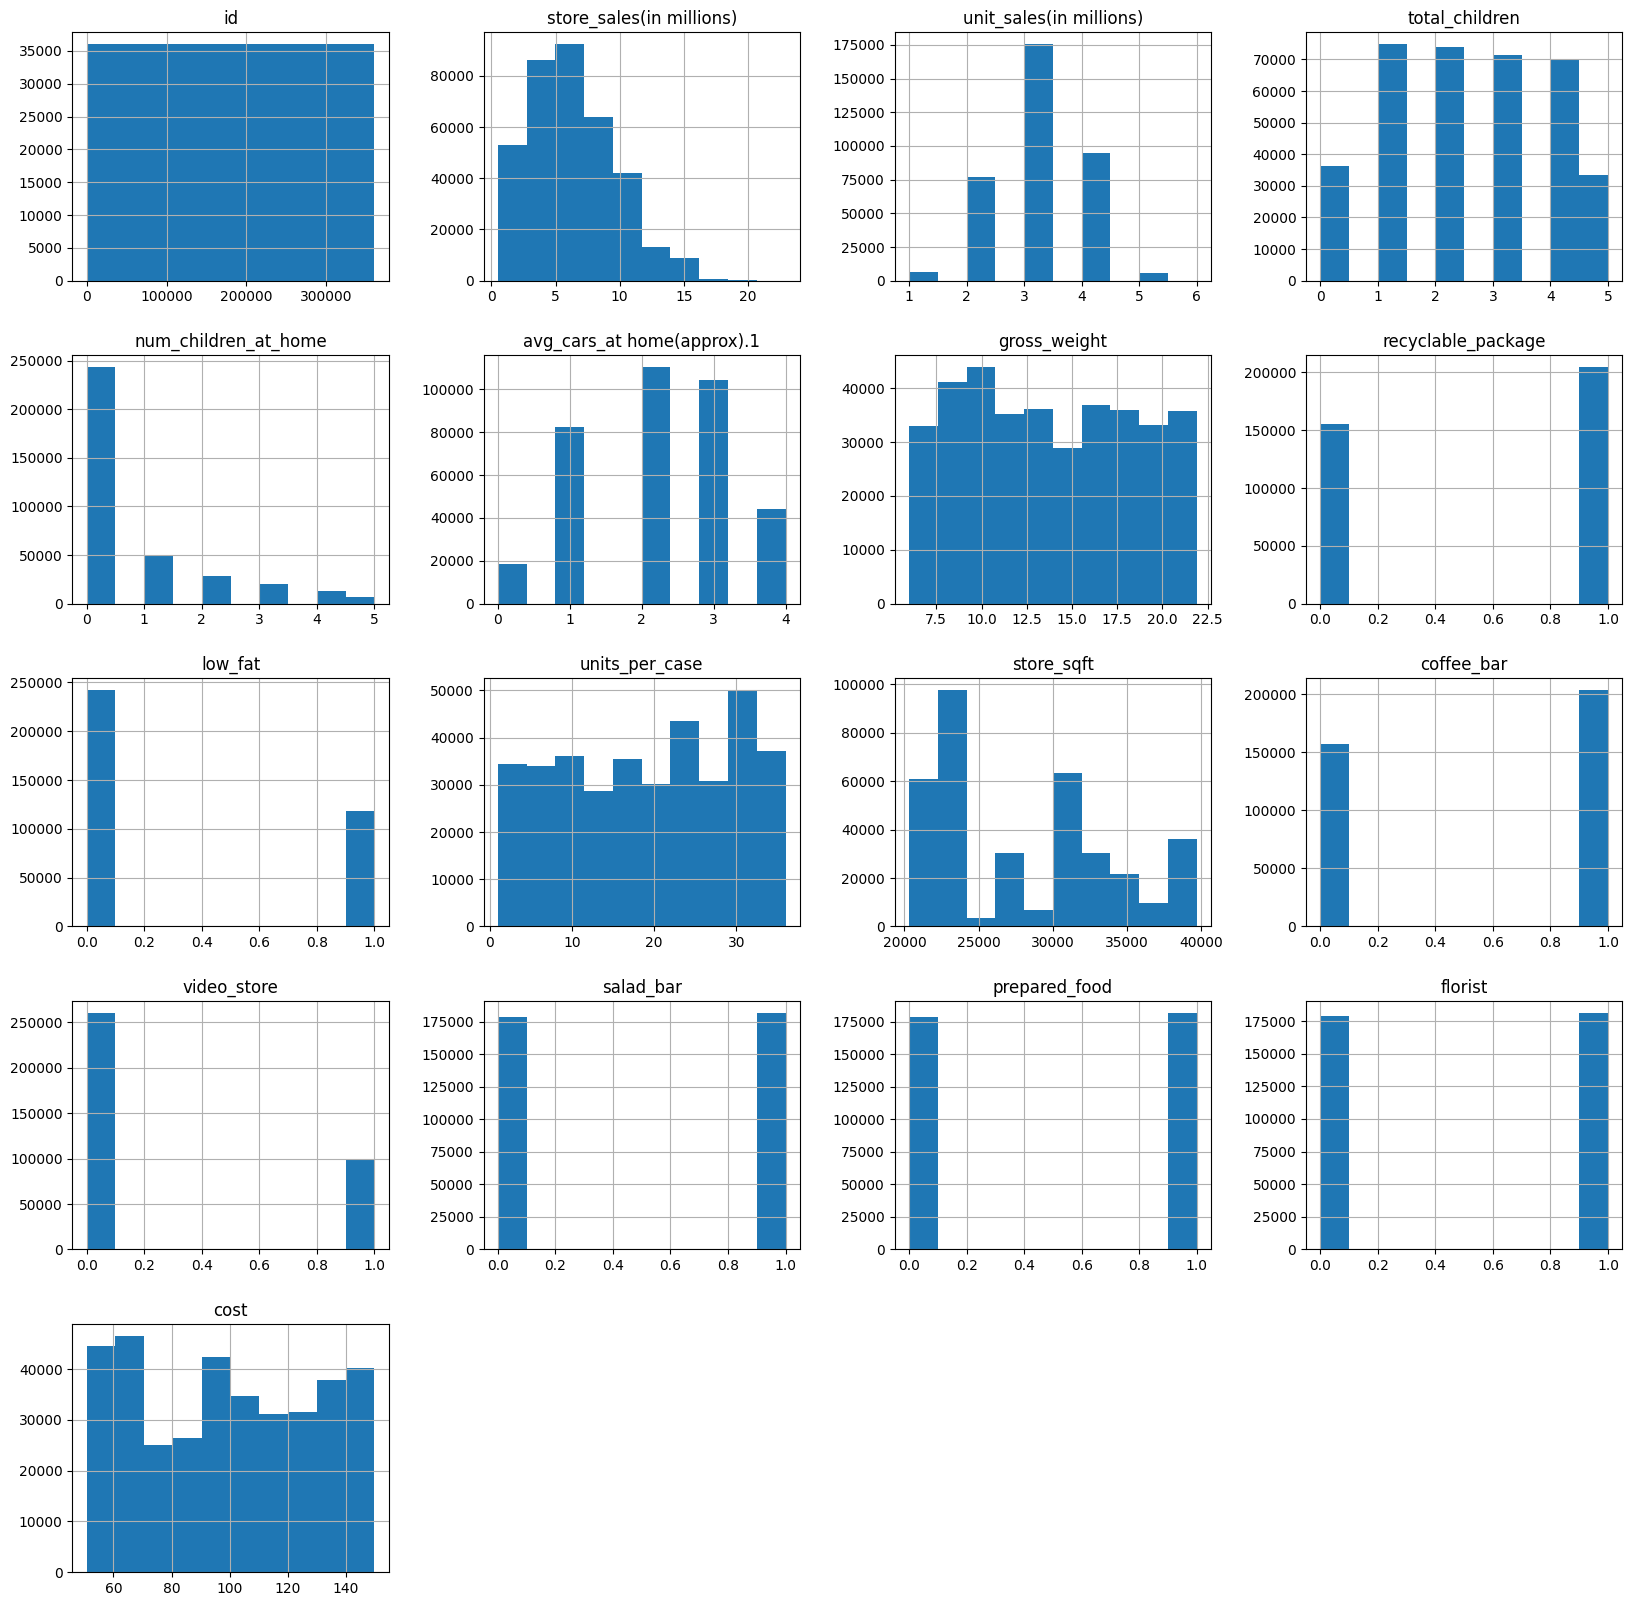

In [46]:
train.hist(figsize=(20,20))

In [37]:
train.isnull().sum()

id                            0
store_sales(in millions)      0
unit_sales(in millions)       0
total_children                0
num_children_at_home          0
avg_cars_at home(approx).1    0
gross_weight                  0
recyclable_package            0
low_fat                       0
units_per_case                0
store_sqft                    0
coffee_bar                    0
video_store                   0
salad_bar                     0
prepared_food                 0
florist                       0
cost                          0
dtype: int64

In [ ]:
def remove_value(data):
    for col in data.drop('cost', axis = 1).columns:
        print(col)
        quantile_25 = data[col].quantile(0.25)
        quantile_75 = data[col].quantile(0.75)
        iqr = quantile_75 - quantile_25
        min_value = quantile_25 - (1.5 * iqr)
        max_value = quantile_75 + (1.5 * iqr)
        print(min_value, max_value)
        index_to_drop = data[(data[col] < min_value) | (data[col] > max_value)].index
        print()
        print(len(index_to_drop))
        data = data.drop(index_to_drop)
    show_boxplot(data, data.columns)
    return data

In [65]:
X, y = train.drop('cost', axis = 1), train.cost
X_test, y_test = test, sample

In [67]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)

In [80]:
preds_df = pd.DataFrame({'true_value': y_valid})
metrics_df = pd.DataFrame()

In [62]:
classic_models = {
    'LinearRegression': LinearRegression(),
    'DecisionTreeRegressor': DecisionTreeRegressor(max_depth=4, min_samples_leaf=4, random_state=0),
    'RandomForestRegressor': RandomForestRegressor(max_depth=5, min_samples_leaf=4, random_state=0),
    'KNeighborsRegressor': KNeighborsRegressor(n_neighbors=7)
}

In [82]:
for key in classic_models.keys():
    model = classic_models[key].fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    
    mae =  mean_absolute_error(y_valid, y_pred)
    rmse = mean_squared_error(y_valid, y_pred)**0.5
    rmsle = mean_squared_log_error(y_valid, y_pred)**0.5
    r2 = r2_score(y_valid, y_pred)
    
    preds_df[key] = y_pred
    
    metrics_dict = {'model': key, 'MAE': round(mae, 4), 'RMSE': round(rmse, 4), 'RMSLE': round(rmsle, 5), 'R2': round(r2, 4)}
    metrics_df = pd.concat([metrics_df, pd.DataFrame([metrics_dict])], ignore_index=True)

In [86]:
metrics_df

,model,MAE,RMSE,RMSLE,R2
0,LinearRegression,25.5809,29.6383,0.31681,0.0190
1,DecisionTreeRegressor,25.0780,29.0922,0.31054,0.0549
2,RandomForestRegressor,24.9605,28.9801,0.30950,0.0621
3,KNeighborsRegressor,26.1966,31.0072,0.32841,-0.0737


RandomForestRegressor обладает лучшей предсказательной способностью и высокими метриками качества MAE - 24.9 R2-0.06